### Searching, Sorting, and Timing:PROPERTIES:



#### Agenda



1.  Timing (Empirical runtime analysis)
    1.  Prelude: Timing list indexing
    2.  Linear search
    3.  Binary search
    4.  Insertion sort
    5.  Bubble sort



#### 1.  Timing



In [1]:
import time
print(time.time())

1612804096.59215


In [2]:
t1 = time.time()
time.sleep(1)
t2 = time.time()
print(t2 - t1)

1.0005099773406982


#### 1.  Prelude: Timing list indexing



In [3]:
lst = [0] * 10**5

In [4]:
import timeit
print(timeit.timeit(stmt='lst[0]', globals=globals()))

0.040712614000000036


In [5]:
print(timeit.timeit(stmt='lst[10**5-1]', globals=globals()))

0.03996974599999992


In [6]:
print('lst[{}]'.format(1))

lst[1]


In [7]:
times = [timeit.timeit(stmt='lst[{}]'.format(i),
                         globals=globals(),
                         number=1000)
           for i in range(10**5)]

In [8]:
times[:10]

[4.279100000004199e-05,
 4.1857000000034006e-05,
 4.1602999999890145e-05,
 4.099199999996195e-05,
 4.0858999999837664e-05,
 4.117900000011332e-05,
 4.1210000000013736e-05,
 6.0267000000058246e-05,
 4.850899999997438e-05,
 4.082599999999381e-05]

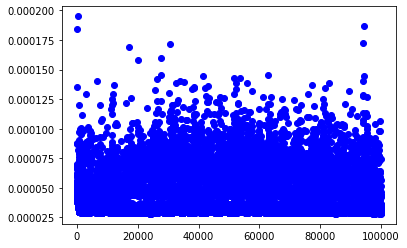

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'bo')

Observation: accessing an element in a list by index takes a constant
 amount of time, regardless of position.

How? **A Python list uses an array as its underlying data storage
mechanism.** To access an element in an array, the interpreter:

1.  Computes an *offset* into the array by multiplying the element's
    index by the size of each array entry (which are uniformly sized,
    since they are merely *references* to the actual elements)
2.  Adds the offset to the *base address* of the array



#### 1.  Linear Search



Task: to locate an element with a given value in a list (array).



In [10]:
def lindex(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return i
    return -1

In [11]:
lst = list(range(100))
lindex(lst, 10)

10

In [12]:
lindex(lst, 99)

99

In [13]:
lindex(lst, -2)

-1

In [14]:
import timeit
lst = list(range(1000))
ltimes = [timeit.timeit(stmt='lindex(lst, {})'.format(x),
                         globals=globals(),
                         number=100)
           for x in range(1000)]

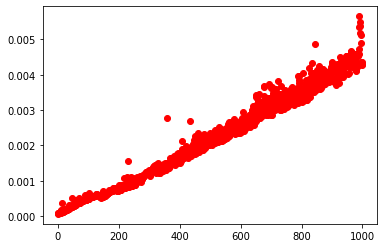

In [15]:
import matplotlib.pyplot as plt
plt.plot(ltimes, 'ro')

#### 1.  Binary search



Task: to locate an element with a given value in a list (array) whose
 contents are *sorted in ascending order*.



In [16]:
def index(lst, x):
    def binsearch_rec(lst,x,l,h):
        mid = ((h - l) // 2) + l
        if lst[mid] == x:
            return mid
        if (h - l) == 1:
            return -1
        newlow = mid + 1 if lst[mid] < x else l
        newhigh = mid - 1 if lst[mid] > x else h
        return binsearch_rec(lst,x,newlow,newhigh)
    return binsearch_rec(lst,x,0,len(lst))

In [17]:
lst = list(range(1000))
print(index(lst, 10))

10


In [18]:
print(index(lst, 999))

999


In [19]:
print(index(lst, -1))

-1


In [20]:
import timeit
lst = list(range(1000))
times = [timeit.timeit(stmt='index(lst, {})'.format(x),
                         globals=globals(),
                         number=1000)
           for x in range(1000)]

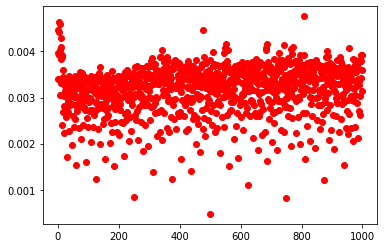

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [22]:
def iter_index(lst, x):
    l = 0
    h = len(lst)
    while h > l:
        mid = ((h - l) // 2) + l
        if lst[mid] == x:
            return mid
        l = mid + 1 if lst[mid] < x else l
        h = mid - 1 if lst[mid] > x else h
    return -1

In [23]:
import timeit
iter_no_times = []
for size in range(1000, 100000, 100):
    lst = list(range(size))
    iter_no_times.append(timeit.timeit(stmt='iter_index(lst, -1)',
                                 globals=globals(),
                                 number=1000))

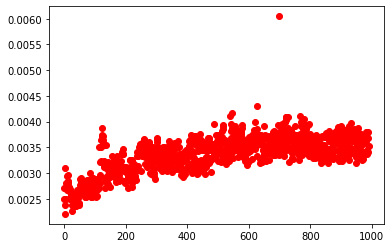

In [24]:
import matplotlib.pyplot as plt
plt.plot(iter_no_times, 'ro')

In [25]:
import timeit
etimes = []
for e in range(5, 20):
    lst = list(range(2**e))
    etimes.append(timeit.timeit(stmt='iter_index(lst, -1)',
                                 globals=globals(),
                                 number=100000))

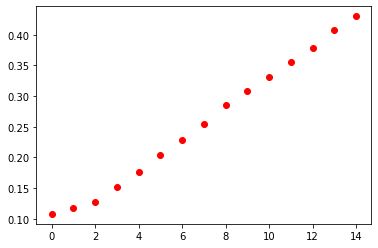

In [26]:
import matplotlib.pyplot as plt
plt.plot(etimes, 'ro')
plt.show()

#### 1.  Insertion sort



-   **Task**: to sort the values in a given list (array) in ascending order.



In [27]:
import random
lst = list(range(1000))
random.shuffle(lst)

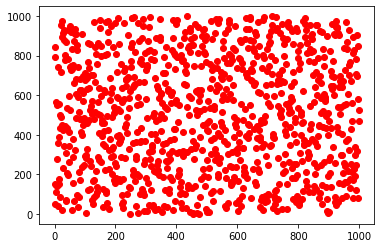

In [28]:
plt.plot(lst, 'ro')
plt.show()

In [29]:
def insertion_sort(lst):
    pass

In [30]:
insertion_sort(lst)

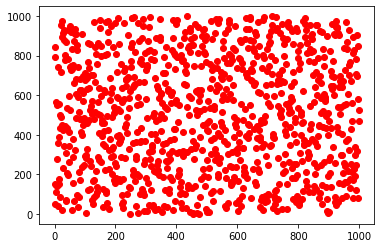

In [31]:
plt.plot(lst, 'ro')
plt.show()

In [32]:
import timeit
import random
times = [timeit.timeit(stmt='insertion_sort(lst)',
                         setup='lst=list(range({})); random.shuffle(lst)'.format(size),
                         globals=globals(),
                         number=1)
           for size in range(100, 5000, 250)]

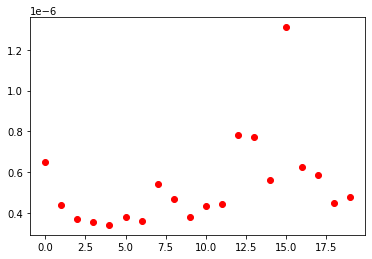

In [33]:
plt.plot(times, 'ro')
plt.show()

#### 1.  Bubble sort



-   Another simple sort algorithm is **Bubble sort**. This algorithm



In [34]:
def bubble_sort(lst):
    pass